In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Data Loading
# Load TCGA gene expression data
# Assuming you have a CSV file named 'tcga_gene_data.csv' with features and labels
#data = pd.read_csv('tcga_gene_data.csv')
data = pd.read_csv('/Users/meng_fanze/Library/CloudStorage/OneDrive-Chalmers/Master 1/MVE441 Statistic learning for big data/Project 1/TCGAdata.txt', delimiter = ' ')
label = pd.read_csv('/Users/meng_fanze/Library/CloudStorage/OneDrive-Chalmers/Master 1/MVE441 Statistic learning for big data/Project 1/TCGAlabels', delimiter = ' ')

# Assuming the last column is the target variable and the rest are features
X = data.to_numpy()
y = label.to_numpy()
y = y.ravel()

# Step 2: Introducing Noise
def add_noise(data, noise_level):
    np.random.seed(42)  # for reproducibility
    noise = np.random.normal(0, noise_level, size=data.shape)
    return data + noise

# Define noise levels to simulate increasing class overlap
noise_levels = [0.1, 0.5, 1.0]  # Example noise levels, adjust as needed

# Step 3: Model Training and Evaluation
results = []
feature_importance_results = []

for noise_level in noise_levels:
    X_noisy = add_noise(X, noise_level)
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)
    
    # Train RandomForest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)
    rf_pred = rf_classifier.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    rf_precision = precision_score(y_test, rf_pred, average='macro')
    rf_recall = recall_score(y_test, rf_pred, average='macro')
    rf_f1 = f1_score(y_test, rf_pred, average='macro')
    
    # Train GradientBoosting Classifier
    gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
    gb_classifier.fit(X_train, y_train)
    gb_pred = gb_classifier.predict(X_test)
    gb_accuracy = accuracy_score(y_test, gb_pred)
    gb_precision = precision_score(y_test, gb_pred, average='macro')
    gb_recall = recall_score(y_test, gb_pred, average='macro')
    gb_f1 = f1_score(y_test, gb_pred, average='macro')
    
    # Feature Importance Analysis
    rf_feature_importance = rf_classifier.feature_importances_
    gb_feature_importance = gb_classifier.feature_importances_
    
    feature_importance_results.append({
        'Noise Level': noise_level,
        'RF Feature Importance': rf_feature_importance,
        'GB Feature Importance': gb_feature_importance
    })
    
    results.append({
        'Noise Level': noise_level,
        'RF Accuracy': rf_accuracy, 'RF Precision': rf_precision,
        'RF Recall': rf_recall, 'RF F1': rf_f1,
        'GB Accuracy': gb_accuracy, 'GB Precision': gb_precision,
        'GB Recall': gb_recall, 'GB F1': gb_f1
    })

# Display results
results_df = pd.DataFrame(results)
feature_importance_df = pd.DataFrame(feature_importance_results)

print("Results of classification:")
print(results_df)

print("\nFeature Importance Comparison:")
print(feature_importance_df)

Results of classification:
   Noise Level  RF Accuracy  RF Precision  RF Recall     RF F1  GB Accuracy  \
0          0.1     0.986159      0.976906   0.958962  0.967483     0.986159   
1          0.5     0.982699      0.967858   0.921090  0.940557     0.987889   
2          1.0     0.977509      0.986776   0.871090  0.897308     0.982699   

   GB Precision  GB Recall     GB F1  
0      0.954186   0.968717  0.960228  
1      0.957123   0.938898  0.947607  
2      0.967797   0.919386  0.939700  

Feature Importance Comparison:
   Noise Level                              RF Feature Importance  \
0          0.1  [8.096916141755905e-05, 5.9693173469034265e-06...   
1          0.5  [2.2713586889390734e-05, 2.2019225643002395e-0...   
2          1.0  [4.943590638791843e-05, 4.884920320506664e-05,...   

                               GB Feature Importance  
0  [0.0, 0.0, 0.21961105291841268, 1.500547203522...  
1  [0.0, 0.0, 0.22006055540721822, 0.000105434087...  
2  [0.0, 7.437038822961882

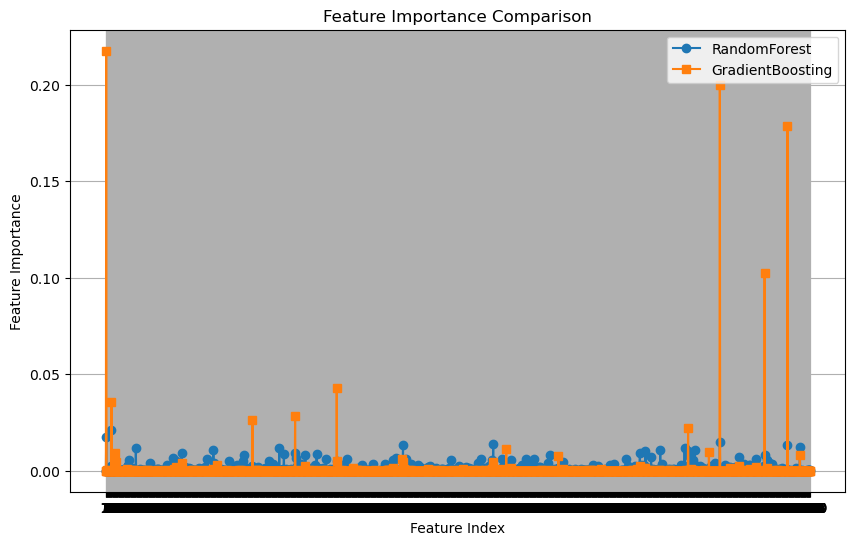

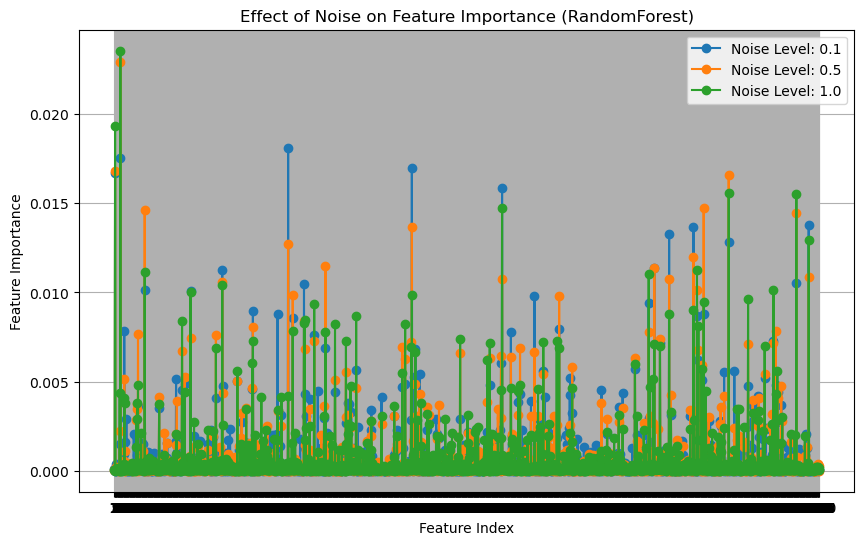

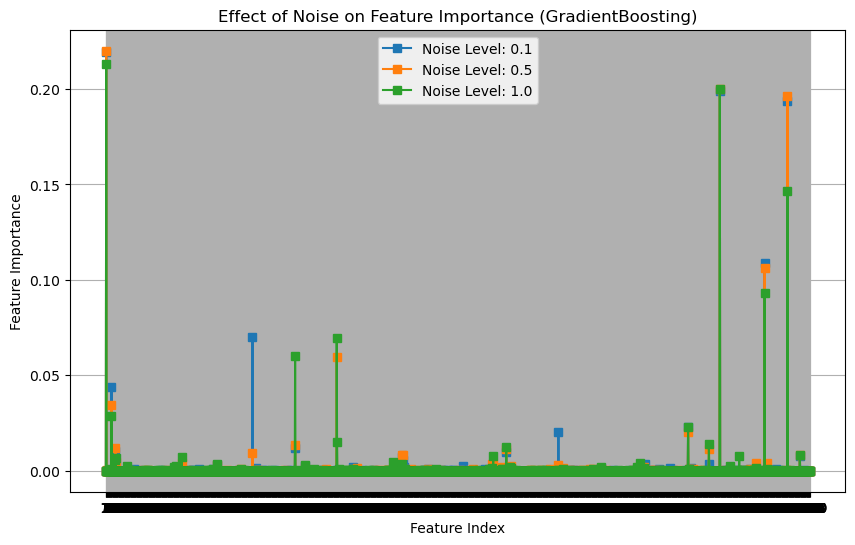

In [9]:
import matplotlib.pyplot as plt

# Function to plot feature importance
def plot_feature_importance(importance_rf, importance_gb, noise_levels):
    plt.figure(figsize=(10, 6))
    plt.plot(importance_rf, label='RandomForest', marker='o')
    plt.plot(importance_gb, label='GradientBoosting', marker='s')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Importance')
    plt.title('Feature Importance Comparison')
    plt.legend()
    plt.xticks(range(len(importance_rf)), range(1, len(importance_rf) + 1))
    plt.grid(True)
    plt.show()

# Function to plot effect of noise on feature importance for RandomForest
def plot_effect_of_noise_rf(feature_importance_df):
    plt.figure(figsize=(10, 6))
    for index, row in feature_importance_df.iterrows():
        plt.plot(row['RF Feature Importance'], label=f'Noise Level: {row["Noise Level"]}', marker='o')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Importance')
    plt.title('Effect of Noise on Feature Importance (RandomForest)')
    plt.legend()
    plt.xticks(range(len(row['RF Feature Importance'])), range(1, len(row['RF Feature Importance']) + 1))
    plt.grid(True)
    plt.show()

# Function to plot effect of noise on feature importance for GradientBoosting
def plot_effect_of_noise_gb(feature_importance_df):
    plt.figure(figsize=(10, 6))
    for index, row in feature_importance_df.iterrows():
        plt.plot(row['GB Feature Importance'], label=f'Noise Level: {row["Noise Level"]}', marker='s')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Importance')
    plt.title('Effect of Noise on Feature Importance (GradientBoosting)')
    plt.legend()
    plt.xticks(range(len(row['GB Feature Importance'])), range(1, len(row['GB Feature Importance']) + 1))
    plt.grid(True)
    plt.show()



# Extract feature importance from the dataframe
rf_importance_means = feature_importance_df['RF Feature Importance'].mean(axis=0)
gb_importance_means = feature_importance_df['GB Feature Importance'].mean(axis=0)

# Plot overlap of important features
plot_feature_importance(rf_importance_means, gb_importance_means, range(1, len(rf_importance_means) + 1))

# Plot effect of noise on feature importance for RandomForest
plot_effect_of_noise_rf(feature_importance_df)

# Plot effect of noise on feature importance for GradientBoosting
plot_effect_of_noise_gb(feature_importance_df)

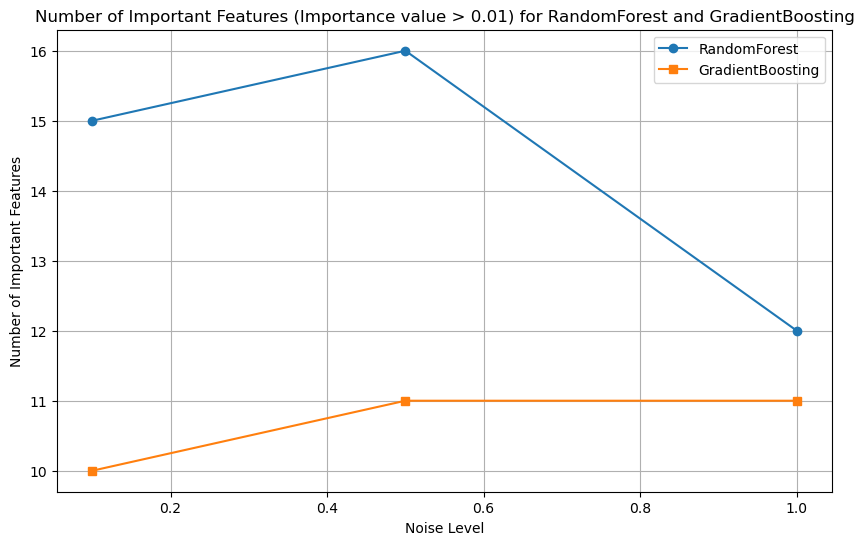

In [13]:
# Function to count the number of important features above a threshold
def count_important_features(importance, threshold):
    return np.sum(importance > threshold)

# Threshold for importance value
threshold = 0.01

# Count the number of important features for each noise level and classifier
important_features_rf = [count_important_features(importance, threshold) for importance in feature_importance_df['RF Feature Importance']]
important_features_gb = [count_important_features(importance, threshold) for importance in feature_importance_df['GB Feature Importance']]

# Plot the number of important features for RandomForest and GradientBoosting
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, important_features_rf, label='RandomForest', marker='o')
plt.plot(noise_levels, important_features_gb, label='GradientBoosting', marker='s')
plt.xlabel('Noise Level')
plt.ylabel('Number of Important Features')
plt.title('Number of Important Features (Importance value > 0.01) for RandomForest and GradientBoosting')
plt.legend()
plt.grid(True)
plt.show()